<a href="https://colab.research.google.com/github/4deepprk/4deepprk.github.io/blob/master/DL109_BatchNorm_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outline

1. Load dataset and visualise
2. Add batchnorm layers
3. Comparison with and without batchnorm layers
4. Add dropout layer
5. Comparison with and without dropout layer

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset and visualisation

In [2]:
# Downloading the MNIST dataset and transforming it to Tensor
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
batch_size = 4 # size of the training batch is 4

In [4]:
# Data loader is created (shuffling of the dataset is set as True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [5]:
# Iterator is created
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape) # we can observe the image is grey scale (MNIST data)
print(labels[0].item()) # label of a particular image

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
1


In [6]:
# Plotting the images from the iterator
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0))) # rearranging the dimensions to plot the image
    plt.title(title)
    plt.show()

In [7]:
# Displaying and plotting the images in a grid as a one concatenated image
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    # to make grid of images torchvision.utils.make_grid is used
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

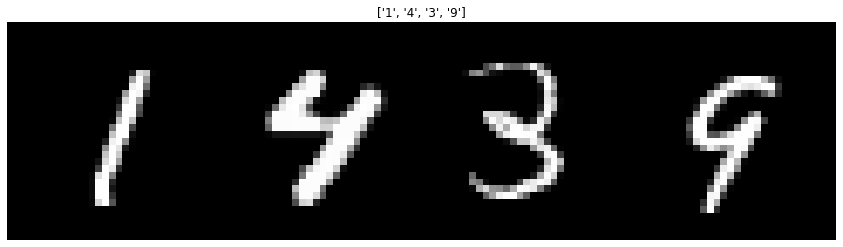

In [8]:
# One concatenated image of batch of images
images, labels = show_batch_images(trainloader)

## Batchnorm

In [9]:
# A standard neural network without batch normalization

# Typically we have two components in CNN's which are 1. features and 2. classifiers
# 1. features (not a fully connected layer) - to use convolution layers to identify the features
# 2. classifiers (fully connected layer) - to classify the input

# Building a fully connected layer
class MyNet(nn.Module):
    def __init__(self): 
        super(MyNet, self).__init__()
        # classifier (fully connected layer)
        self.classifier = nn.Sequential(
            # 28 x 28 image is flattened into a single vector or tensor of 1D
            nn.Linear(784, 48),  # 28 x 28 = 784 features
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1) # flattening the input image with single dimension
        x = self.classifier(x)
        return x

In [10]:
# Neural network with batch normalization (for classifier (fully connected layer))
# Batch normalization can be added after the linear layer or may be after the 
# non-linear activation layer (we usually prefer to do it after the linear layer)
class MyNetBN(nn.Module):
    def __init__(self): 
        super(MyNetBN, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            # 1D batch normalization
            # across different images in the batches we would want to ensure
            # that the variation in each of the 48 output features(numbers)
            # corresponding to an image is similar (zero mean and fixed standard
            # deviation)

            # Batch normalization is trying to continuously compute the mean and
            # the standard deviation of the data across different batches
            nn.BatchNorm1d(48), # batch normalization after the linear layer
            nn.ReLU(),
            nn.Linear(48, 24),
            # 1D batch normalization
            # across different images in the batches we would want to ensure
            # that the variation in each of the 24 output features(numbers)
            # corresponding to an image is similar (zero mean and fixed standard
            # deviation)

            # Batch normalization is trying to continuously compute the mean and
            # the standard deviation of the data across different batches
            nn.BatchNorm1d(24), # batch normalization after the linear layer
            nn.ReLU(),
            nn.Linear(24, 10)
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1) # flattening the input image with single dimension
        x = self.classifier(x)
        return x

In [11]:
# Instantiating the model (fully connected neural network without CNN)
model = MyNet()
print(model)

MyNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [12]:
# Instantiating the batch normalized model (fully connected neural network without CNN)
model_bn = MyNetBN()
print(model_bn)

MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [13]:
batch_size = 512

In [14]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [15]:
loss_fn = nn.CrossEntropyLoss()
''' We are simultaneously training two models together'''
opt = optim.SGD(model.parameters(), lr=0.01) # model without batch normalization
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01) # model with batch normalization

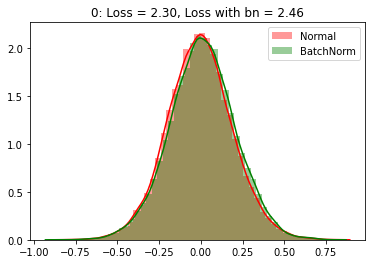

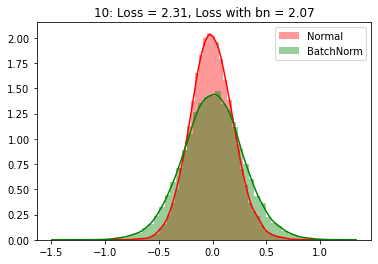

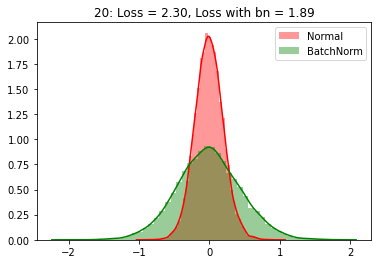

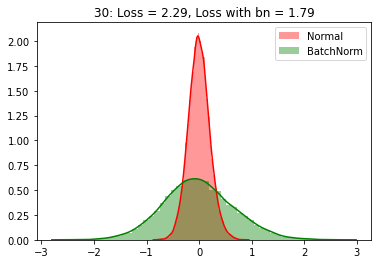

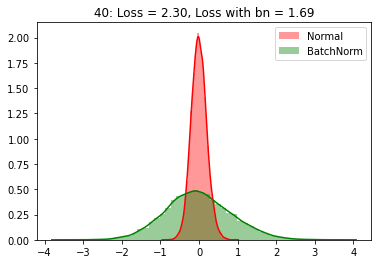

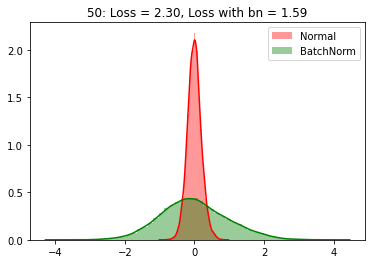

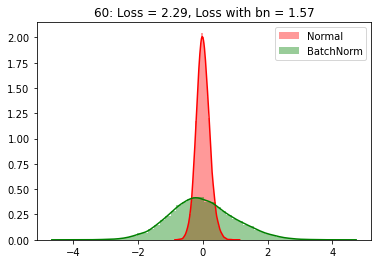

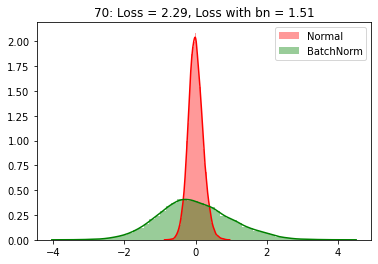

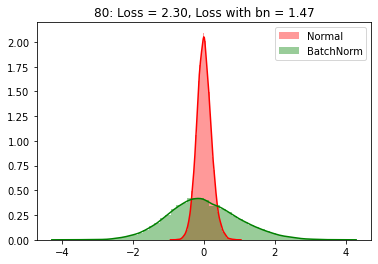

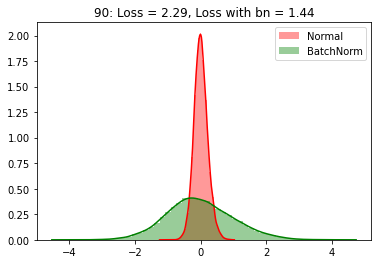

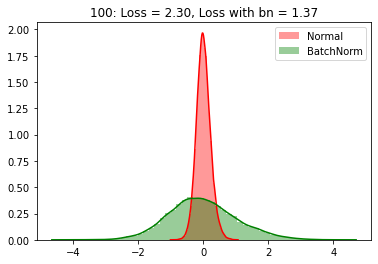

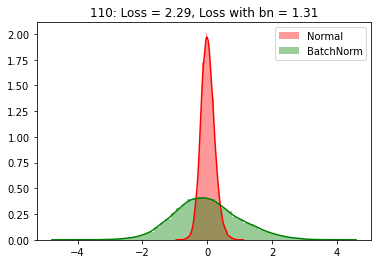

----------------------


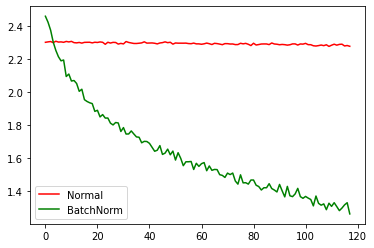

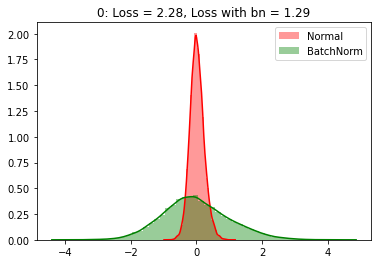

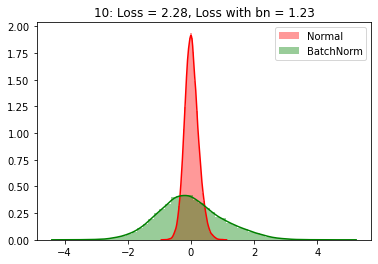

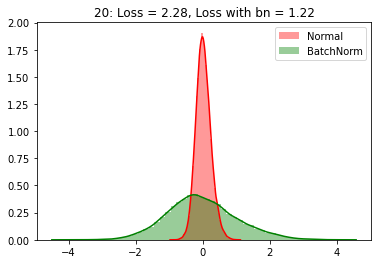

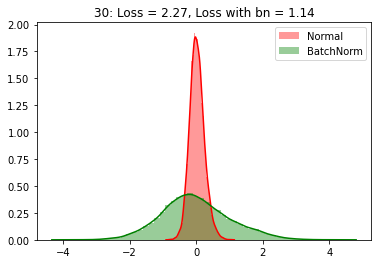

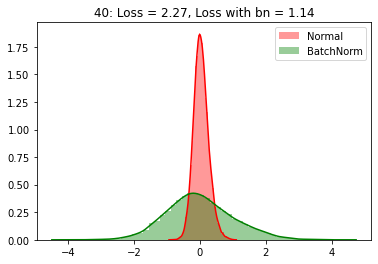

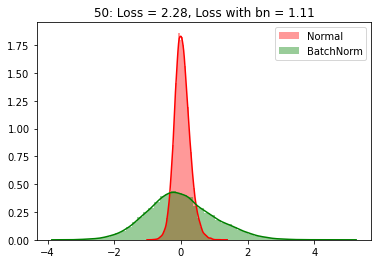

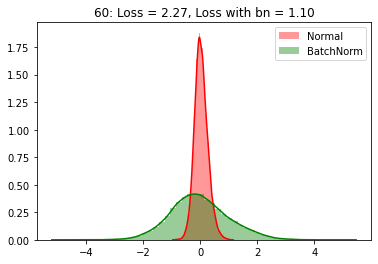

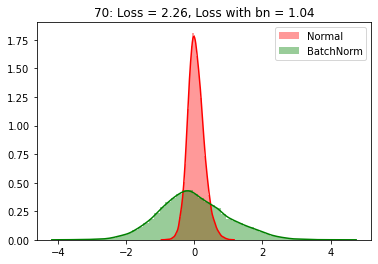

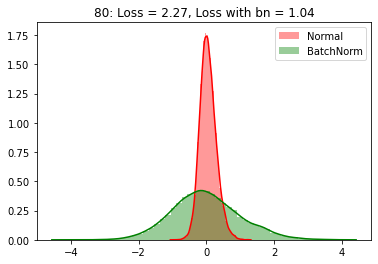

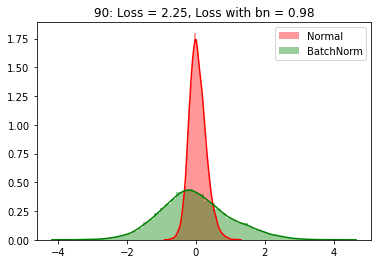

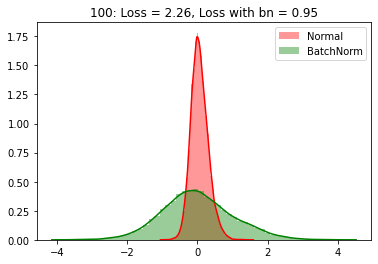

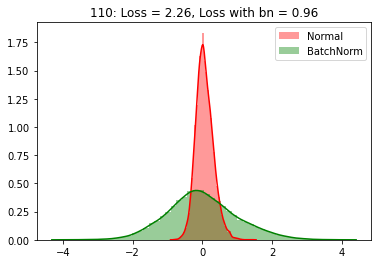

----------------------


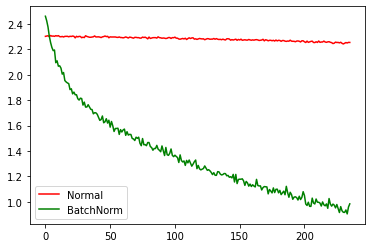

In [16]:
# Learning or training (simultaneously train two models)
loss_arr = []
loss_bn_arr = []

max_epochs = 2

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        # training steps for normal model
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # training steps for bn model
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())

        # We are interested in finding out what is the distribution of values computed 
        # by the network.        
        # Once in 10 iteration we do visualization of how the network performance
        # with and without batch normalization

        if i % 10 == 0:
        
            inputs = inputs.view(inputs.size(0), -1) # flattening to a single dimension
            # eval() mode is relevant in the case of batch normalization and
            # dropout (does not bring any change to the model but sets the model
            # to eval() mode)

            ''' In batch normalization (training mode) is contantly trying to
            learn the mean and the standard deviation of different feature values
            across images
            
            But, whereas in the eval() mode the model is not going to learn the
            distributions anymore but simply using scaling ie., the factors that
            have been already learned to scale the data (stops learning for mean
            and standard deviation but uses the learned mean and standard deviation
            to modify the input data)'''

            # We are insteresed in plotting variation in the outputs when batch 
            # normalization is used and not used by plotting histogram (we can
            # plot histogram that shows the frequency of occurence of certain values
            # amongst the set of features).

            model.eval() # uses the learned parameters
            model_bn.eval() # uses the learned parameters (including mean and standard deviation)
            
            a = model.classifier[0](inputs) # 0th sequential layer of the classifier
#             a = model.classifier[1](a) # 1st sequential layer of the classifier
#             a = model.classifier[2](a) # 2nd sequential layer of the classifier
            a = a.detach().numpy().ravel() # In order to plot histogram we detach, convert to numpy and flatten
            # We are actually seeing 48 features and the batch size is 512. Therefore
            # the total size of "a" is 512 x 48 which is a single flattened vector

            # We are plotting the histogram of this 512 x 48 flattened vector (
            # such that for a given value what is the frequency of occurence)
            # histogram is plotted by using seabornes distplot
            sns.distplot(a, kde=True, color='r', label='Normal') 
            
            b = model_bn.classifier[0](inputs)
            b = model_bn.classifier[1](b)
#             b = model_bn.classifier[2](b)
#             b = model_bn.classifier[3](b)
#             b = model_bn.classifier[4](b)
            b = b.detach().numpy().ravel() # In order to plot histogram we detach, convert to numpy and flatten
            
            sns.distplot(b, kde=True, color='g', label='BatchNorm') 
            plt.title('%d: Loss = %0.2f, Loss with bn = %0.2f' % (i, loss.item(), loss_bn.item()))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            # After plotting the histogram for model with and without batch normalization
            # we again set the model to .train() from .eval() so that for the next 
            # 100 iterations the model can learn the parameters
            model.train()
            model_bn.train()
        
    ''' What we can infer from the histogram plots with and without batch norm is
    that; 1. Without batch norm the model is trained with a very narrow distribution
    throughout - distribution changes a lot (the last output layer will only see this narrow distribution for conclusion)
    which results high loss whereas 
    2. With batch norm the model is trained with a uniform distribution throughout - distribution remains the same mostly
    which results faster reduction in losss (the last output layer will see a uniform distribution for conclusion)'''

    print('----------------------')

    plt.plot(loss_arr, 'r', label='Normal')
    plt.plot(loss_bn_arr, 'g', label='BatchNorm')
    plt.legend()
    plt.show()

In [17]:
# Using batch normalization in CNN 

class CNN_BN(nn.Module):
    def __init__(self): 
        super(MyNetBN, self).__init__()
        self.features = nn.Sequential(
            # Input image is (1 x 28 x 28) or (28 x 28)
            # (1, 3, 5) -> Here 1 is channel or depth of input image (not RGB)
            # and 3 is the number of kernels (becomes the depth of the output) &
            # 5 is the width and height of the kernel or filter (where depth is 
            # 1 because the depth of input image is 1)

            # Converting from N x 1 x 28 x 28 to N x 3 x 24 x24 (where N is the 
            # the number of images per batch)

            nn.Conv2d(1, 3, 5),         # (N, 1, 28, 28) -> (N,  3, 24, 24)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 3, 24, 24) -> (N,  3, 12, 12)
            nn.Conv2d(3, 6, 3),
            # We do 2D batch normalization and 6 is nothing but the number of inputs
            # it receives
            nn.BatchNorm2d(6)           # (N, 3, 12, 12) -> (N,  6, 10, 10) 
        )
        self.features1 = nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N, 6, 10, 10) -> (N,  6, 5, 5)
        )
        self.classifier = nn.Sequential(
            nn.Linear(150, 25),         # (N, 150) -> (N, 25)
            nn.ReLU(),
            nn.Linear(25,10)            # (N, 25) -> (N, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.features1(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

## Dropout

In [68]:
# Dropout is used to overcome overfitting
# best eg., is the use of custom dataset that leads the model to overfit and 
# thus the utility of dropout is more suitable here (as custom dataset has the
# potential to overfit the dataset)

# Overfit scenario: Say the original function is a y = x (simple model) and 
# using a neural network (complex function) for approximating the original function
# leads to overfitting.

# Creating a toy dataset
N = 25
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1) # equally spaced 'N' data points between -1 to +1
Y_train = X_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1)) # value of Y_train will be 0.3 deviation on either sides

X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1) 
Y_test = X_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

# Noise (magnitude) is same for Y_train and Y_test but the individual noise 
# added to X_train and X_test varies.
print(Y_train)
print(Y_test)

tensor([[-0.9569],
        [-0.8728],
        [-0.5926],
        [-1.1576],
        [-0.5458],
        [-1.0264],
        [-0.2624],
        [-0.6231],
        [-0.7885],
        [-0.1487],
        [-0.0785],
        [-0.1028],
        [ 0.0872],
        [ 0.1083],
        [-0.0490],
        [ 0.7419],
        [ 0.2510],
        [ 0.5590],
        [ 0.3691],
        [ 0.6690],
        [ 1.3129],
        [ 0.8866],
        [ 0.1698],
        [ 0.8021],
        [ 0.9460]])
tensor([[-1.2878],
        [-0.8670],
        [-0.4865],
        [-0.6617],
        [-0.6158],
        [ 0.1241],
        [-0.4024],
        [-0.5317],
        [-0.0400],
        [-0.1598],
        [-0.3645],
        [-0.1386],
        [ 0.2684],
        [ 0.1245],
        [ 0.0388],
        [ 0.1037],
        [ 0.2867],
        [ 0.2452],
        [ 0.4351],
        [ 1.2852],
        [ 0.6365],
        [ 0.9703],
        [ 1.2281],
        [ 1.0446],
        [ 1.4086]])


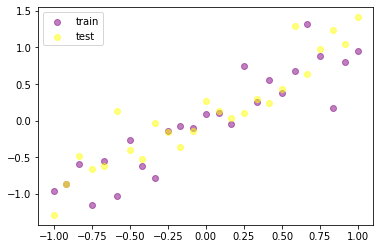

In [69]:
# it is better to convert tensor to numpy arrays for plotting purpose  
plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [70]:
N_h = 100

model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    # As probability increases model takes longer time to learn 
    #(as the number of times a particular neuron is getting gradients flowing through it becomes lesser)
    torch.nn.Dropout(0.8), # increase probability to increase regularization (dropping more neurons such that model to learn even simpler)
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    # As probability increases model takes longer time to learn 
    #(as the number of times a particular neuron is getting gradients flowing through it becomes lesser)
    torch.nn.Dropout(0.8), # increase probability to increase regularization (dropping more neurons such that model to learn even simpler)
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

In [71]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss() # Mean square error loss is used for regrssion problem

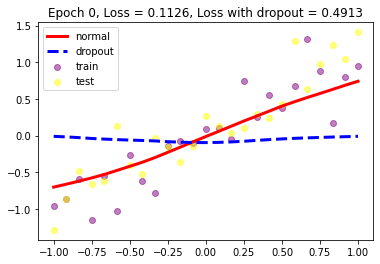

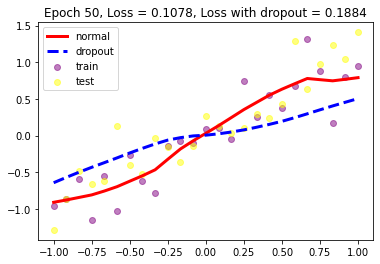

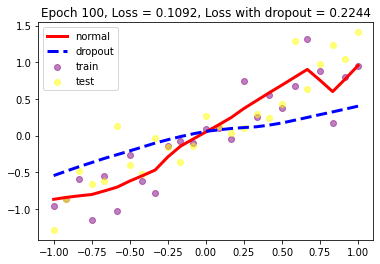

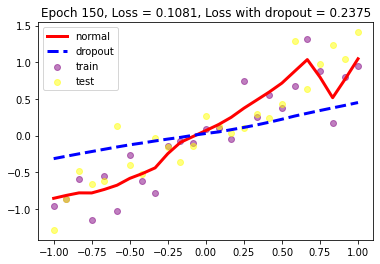

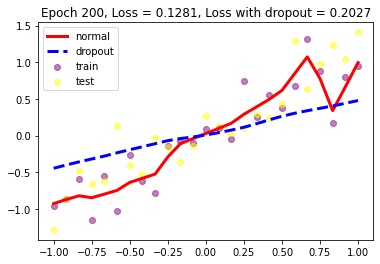

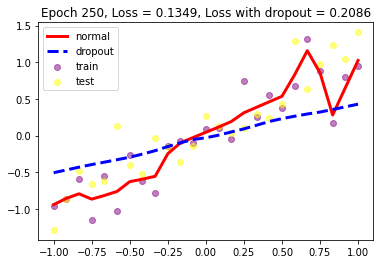

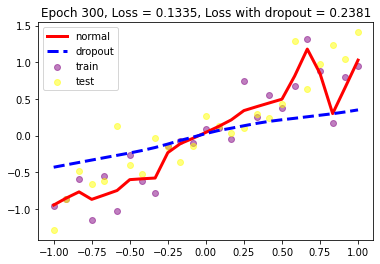

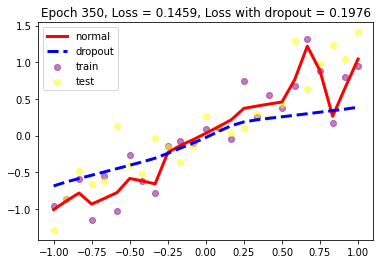

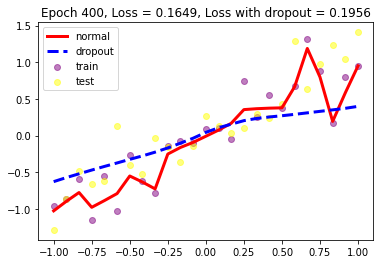

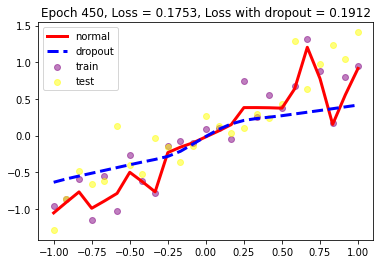

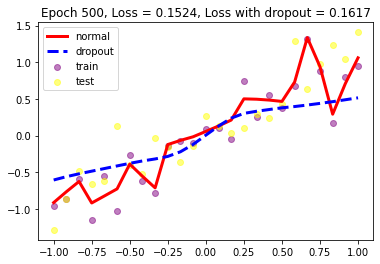

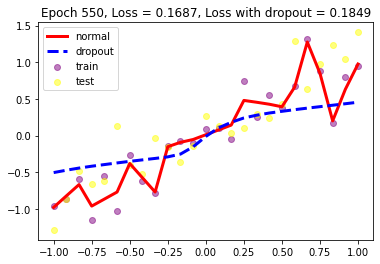

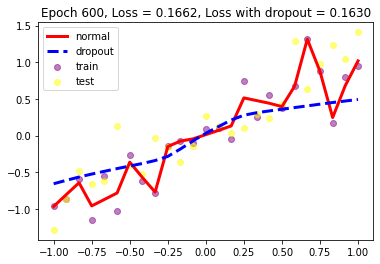

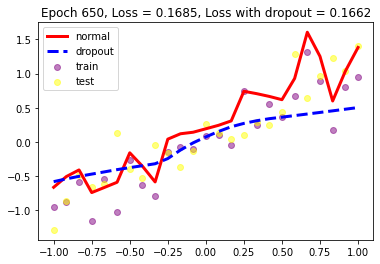

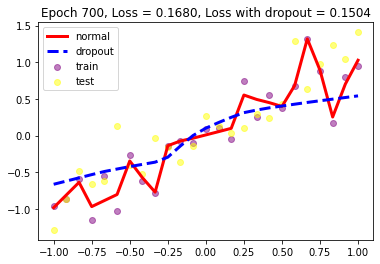

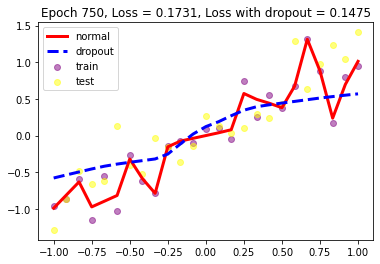

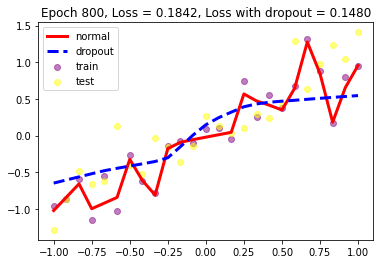

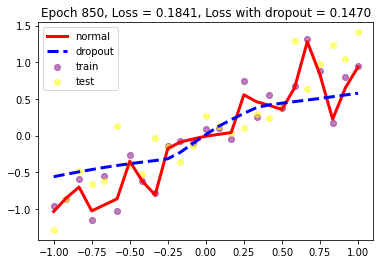

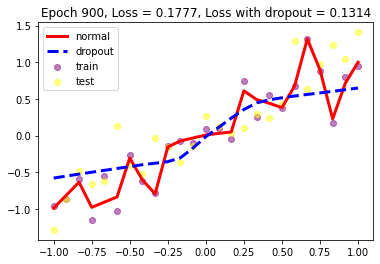

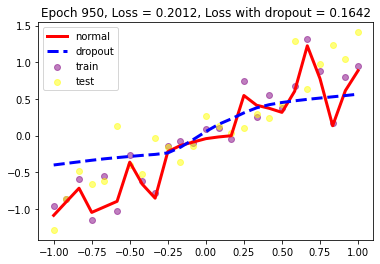

In [72]:
max_epochs = 1000

for epoch in range(max_epochs):
    
    pred = model(X_train) # look at the entire data in a single shot
    loss = loss_fn(pred, Y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    pred_dropout = model_dropout(X_train)
    loss_dropout = loss_fn(pred_dropout, Y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()
    
    
    if epoch % 50 == 0:
        
        model.eval()
        # drop out layer stops dropping of the neurons and instead multiplies 
        # scalar value which is equal to probability which is provided with the
        # weights of all neurons
        model_dropout.eval()  
        
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)
        
        test_pred_dropout = model_dropout(X_test)
        test_loss_dropout = loss_fn(test_pred_dropout, Y_test)
        
        plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
        plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
        plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
        plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3,  label='dropout')
        
        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        
        plt.legend()

        model.train()
        model_dropout.train()
        
        plt.pause(0.05)

## Exercises

1. Try out BatchNorm2d with MNIST dataset on a CNN
2. Try Dropout on a CNN with CIFAR10
3. Think of how to create a dataset which can suffer from large batch variation and/or overfitting
4. Try out BatchNorm and Dropout networks for such dataset